# Driving Visual Analyses with Automobile Data
<br>
<li> Analyzing automobile fuel efficiency over time
<li> Investigating the makes and models of automobiles

### Dataset
**vehicles.csv:** contains fuel efficiency performance metrics over time for all makes and models of automobiles in the USA.

**Some terms:**<br>
**engine displacement** The lower the displacement, the less fuel it can consume<br>
**MPG** Miles per gallon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#from ggplot import *
#%matplotlib inline

In [2]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

/Users/ayumi.matsuoka/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
column_names = vehicles.columns.values
column_names[[70,71,72,73,74,76,79]]

array(['fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr',
       'c240bDscr', 'startStop'], dtype=object)

In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42136 entries, 0 to 42135
Data columns (total 83 columns):
barrels08          42136 non-null float64
barrelsA08         42136 non-null float64
charge120          42136 non-null float64
charge240          42136 non-null float64
city08             42136 non-null int64
city08U            42136 non-null float64
cityA08            42136 non-null int64
cityA08U           42136 non-null float64
cityCD             42136 non-null float64
cityE              42136 non-null float64
cityUF             42136 non-null float64
co2                42136 non-null int64
co2A               42136 non-null int64
co2TailpipeAGpm    42136 non-null float64
co2TailpipeGpm     42136 non-null float64
comb08             42136 non-null int64
comb08U            42136 non-null float64
combA08            42136 non-null int64
combA08U           42136 non-null float64
combE              42136 non-null float64
combinedCD         42136 non-null float64
combinedUF         42

In [5]:
len(pd.unique(vehicles.year))

38

In [6]:
vehicles['year'].min()

1984

In [7]:
vehicles['year'].max()

2021

### <li>What types of fuel are used as the automobiles' primary fuel types?

In [8]:
vehicles['fuelType1'].value_counts()

Regular Gasoline     28294
Premium Gasoline     12237
Diesel                1198
Electricity            229
Midgrade Gasoline      118
Natural Gas             60
Name: fuelType1, dtype: int64

### <li> What types of transmissions these automobies have?

In [9]:
vehicles['trany'].value_counts()

Automatic 4-spd                     11048
Manual 5-spd                         8368
Automatic (S6)                       3179
Automatic 3-spd                      3151
Manual 6-spd                         2810
Automatic 5-spd                      2203
Automatic (S8)                       1886
Automatic 6-spd                      1678
Manual 4-spd                         1483
Automatic (variable gear ratios)      877
Automatic (S5)                        836
Automatic 7-spd                       734
Automatic 8-spd                       521
Automatic (AM-S7)                     467
Automatic 9-spd                       397
Automatic (S7)                        340
Automatic (AM7)                       266
Automatic (S4)                        233
Automatic (A1)                        227
Automatic (AV-S6)                     225
Automatic (S10)                       183
Automatic (AM6)                       160
Automatic (AV-S7)                     159
Manual 7-spd                      

#### We just want to know the number of cars with automatic and manual transmissions.
Automatic -- start with the letter **A**,<br>
Manual -- start with **M**<br>

### <li>Create a new variable 'trany2' that contains the first character of the 'trany'

In [10]:
vehicles['trany2'] = vehicles.trany.str[0]
vehicles['trany2'].value_counts()

A    29251
M    12874
Name: trany2, dtype: int64

***

### <li>Is there an overall trend of how mpg changes over time on average?

In [11]:
# group the data by year
grouped = vehicles.groupby('year')

# compute the mean of three separate columns by the previous grouping
averaged = grouped['comb08', 'highway08', 'city08'].mean()
averaged

,comb08,highway08,city08
year,,,
1984,19.881874,23.075356,17.982688
1985,19.808348,23.042328,17.878307
1986,19.550413,22.699174,17.665289
1987,19.228549,22.445068,17.310345
1988,19.328319,22.702655,17.333628
1989,19.125759,22.465742,17.143972
1990,19.000928,22.337662,17.033395
1991,18.825972,22.253534,16.848940
1992,18.862623,22.439786,16.805531


<li> Rename the columns, and create a new column 'year', which contains the data frame's index

In [12]:
averaged.columns = ['comb08_mean', 'highway08_mean', 'city08_mean']
averaged['year'] = averaged.index
averaged.head()

,comb08_mean,highway08_mean,city08_mean,year
year,,,,
1984,19.881874,23.075356,17.982688,1984
1985,19.808348,23.042328,17.878307,1985
1986,19.550413,22.699174,17.665289,1986
1987,19.228549,22.445068,17.310345,1987
1988,19.328319,22.702655,17.333628,1988


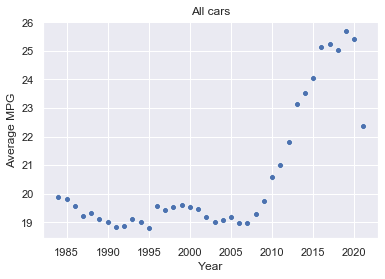

In [13]:
sns.scatterplot('year','comb08_mean', data=averaged)

plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('All cars')
plt.grid(True)
plt.show()

**Note:** Hybrid cars with excellent mileage have recently become more popular, so we should screen out these.

### <li> Remove hybrid cars

**criteria1** selects those rows of the data frame where 'fuelType1' is 'Regular Gasoline', 'Premium Gasoline', or 'Midgrade Gasoline'.<br>

**criteria2** makes sure that the rows contain a null for 'fuelType2'<br>

**criteria3** ensures that the 'atvType' is not 'Hybrid'

In [14]:
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline', 'Premium Gasoline', 'Midgrade Gasoline'])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != 'Hybrid'
vehicles_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]
len(vehicles_non_hybrid)

38317

In [15]:
# group the dataframe by year
grouped = vehicles_non_hybrid.groupby('year')
averaged = grouped['comb08'].mean()
averaged

year
1984    19.121622
1985    19.394686
1986    19.320457
1987    19.164568
1988    19.367607
1989    19.141964
1990    19.031459
1991    18.838060
1992    18.861566
1993    19.137383
1994    19.092632
1995    18.872591
1996    19.530962
1997    19.368000
1998    19.329545
1999    19.239759
2000    19.169345
2001    19.075058
2002    18.950270
2003    18.761711
2004    18.967339
2005    19.005510
2006    18.786398
2007    18.987512
2008    19.191781
2009    19.738095
2010    20.466736
2011    20.838219
2012    21.407328
2013    22.225668
2014    22.274691
2015    22.413858
2016    22.730337
2017    22.801075
2018    22.839861
2019    22.741364
2020    22.805416
2021    22.363636
Name: comb08, dtype: float64

**NOTICE:** there is still a marked rise in the average miles per gallon even after eliminating hybrids

***

### <li> Have there been fewer cars with large engines build more recently?<br>
    
If True, $\Rightarrow$ it could explain the increase in average miles per gallon.

### Verify that larger engine cars have poorer MPG.

large engine $\iff$ high displacement

In [16]:
# 'disp' - the engine displacement in liters.
vehicles_non_hybrid['displ'].unique()

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6, 5.4,
       5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 4.4, 3.7, 6.7,
       4.8, 1.7, 6.2, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, nan, 6.6, 6.4, 0.9])

**NOTE** There are some value that might not be numeric, including the 'nan' value.<br>

#### Remove all rows from the 'vehicles_non_hybrid' that have 'nan displ' values and then do the same for the 'comb08'.

In [17]:
criteria = vehicles_non_hybrid['displ'].notna()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid['displ'] = vehicles_non_hybrid.displ.astype('float')

/Users/ayumi.matsuoka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
criteria = vehicles_non_hybrid['comb08'].notna()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid['comb08'] = vehicles_non_hybrid['comb08'].astype('float')

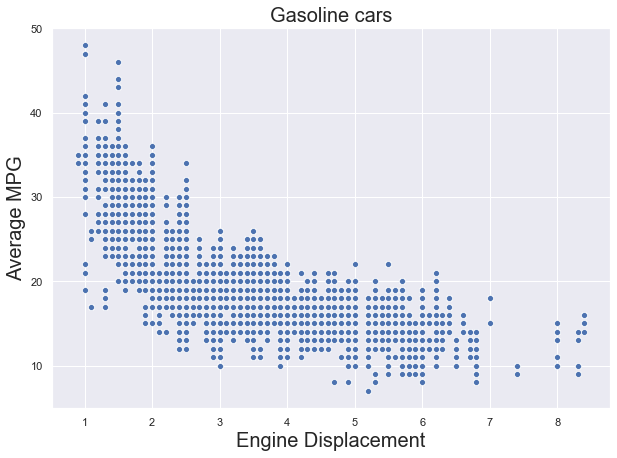

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot('displ','comb08', data=vehicles_non_hybrid)
plt.xlabel('Engine Displacement', fontsize=20)
plt.ylabel('Average MPG', fontsize=20)
plt.title('Gasoline cars', fontsize=20)
plt.show()

**NOTE:** The plot seems to confirm that there is a negative relationship between fuel economy and engine displacement (The higher displacement, the lower MPG)

#### Check whether smaller cars were made in later years on average

In [20]:
grouped_by_year = vehicles_non_hybrid.groupby('year')
avg_grouped_by_year = grouped_by_year['displ', 'comb08'].mean()

#### Reshape the dataframe and convert it from the wide format to long format

In [21]:
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year, id_vars='year')
with pd.option_context('display.max_rows',10):
    display(melted_avg_grouped_by_year)

,year,variable,value
0,1984,displ,3.068449
1,1985,displ,3.075990
2,1986,displ,3.126514
3,1987,displ,3.096474
4,1988,displ,3.113558
...,...,...,...
71,2017,comb08,22.801075
72,2018,comb08,22.839861
73,2019,comb08,22.741364
74,2020,comb08,22.805416


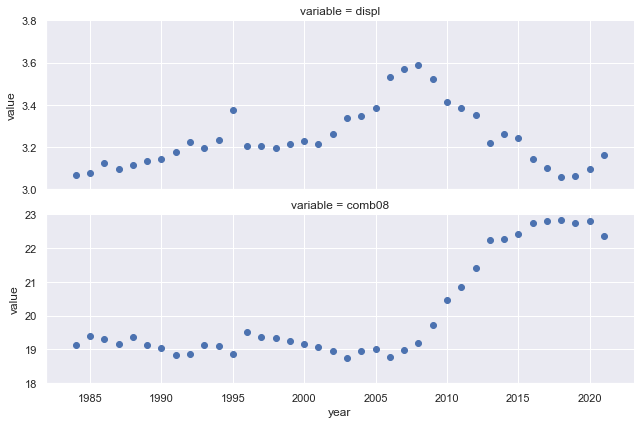

In [22]:
g = sns.FacetGrid(melted_avg_grouped_by_year, row='variable', height=3, aspect=3, sharey=False)
g = g.map(plt.scatter, 'year','value')
g.axes[0,0].set(ylim=(3, 3.8))
g.axes[1,0].set(ylim=(18, 23));

**NOTE:** In later years, the average of the engine displacement became smaller, but the average MPG increased.

***

## Investigating the makes and models of automobiles

## <li> How makes and models of cars inform us about fuel efficiency over time

### the frequency of makes and models of cars available in the U.S., concentraiting on 4-cylinder cars

In [23]:
vehicles_non_hybrid['cylinders'].unique()

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [24]:
# 4-cylinder cars
vehicles_non_hybrid_4 = vehicles_non_hybrid[vehicles_non_hybrid.cylinders == 4.0]

In [25]:
# the numbers of makes that have 4-cylinder cars over the time frame
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby('year').make.nunique()

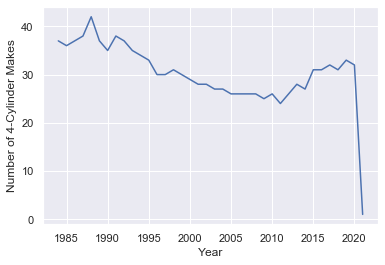

In [26]:
plt.plot(grouped_by_year_4_cylinder)
plt.xlabel('Year')
plt.ylabel('Number of 4-Cylinder Makes')
plt.show()

**NOTE:** There has been a decline, but this plot could be misleading, as we do not know if the total number of available makes per year has changed over the same period of time.

### Find a list of the automobile makes with 4-cylinder engines that were present in every year of this study

In [79]:
from functools import reduce

# unique list of makes per model year
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby('year')
unique_makes = []

for name, group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
    
x = unique_makes[0]

for i in range(len(unique_makes)-1):
    x = x.intersection(unique_makes[i])

unique_makes = x
unique_makes

{'Chevrolet',
 'Dodge',
 'Ford',
 'Honda',
 'Jeep',
 'Mazda',
 'Mitsubishi',
 'Nissan',
 'Subaru',
 'Toyota',
 'Volkswagen'}

There are only 11 manufacturers that made 4-cylinder cars every year during this period

### How these car manufacturers' models have performed over time in terms of fuel efficiency.

In [103]:

# # Create an empty list that will eventually be populated by Booleans.
# boolean_mask = []

# # iterate over each row in the data frame using the 'iterrows' that yields both an index and row
# for index, row in vehicles_non_hybrid_4.iterrows():
    
#     # test whether the make of the current row is in the 'unique_makes' and append the Boolean to the Boolean_mask
#     make = row['make']
#     boolean_mask.append(make in unique_makes)

# # Subset the data frame to contain only rows with a make within the set of 'unique_makes'
# df_common_makes = vehicles_non_hybrid_4[boolean_mask]


## Alternative way
# create a new dataframe that vechiles_non_hybrid_4 contains only rows with a make within the 'unique_makes'
df_common_makes = vehicles_non_hybrid_4[vehicles_non_hybrid_4['make'].isin(unique_makes)]

In [104]:

# group the data frame by both 'year' and 'make' and compute the mean for each grouping
df_common_makes_grouped = df_common_makes.groupby(['year', 'make']).mean().reset_index()
# in the case of multiple grouping keys, pandas returns a multilevel index, so we have to reset index

df_common_makes_grouped.head(3)

,year,make,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,...,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,1984,Chevrolet,14.573295,0.0,0.0,0.0,20.031250,0.0,0.0,0.0,...,0.0,25.328125,0.0,38.234375,0.0,-1445.312500,0.0,0.0,0.0,0.0
1,1984,Dodge,15.303645,0.0,0.0,0.0,19.947368,0.0,0.0,0.0,...,0.0,25.131579,0.0,35.175439,0.0,-1853.070175,0.0,0.0,0.0,0.0
2,1984,Ford,15.112954,0.0,0.0,0.0,19.863636,0.0,0.0,0.0,...,0.0,25.075758,0.0,36.333333,0.0,-1738.636364,0.0,0.0,0.0,0.0


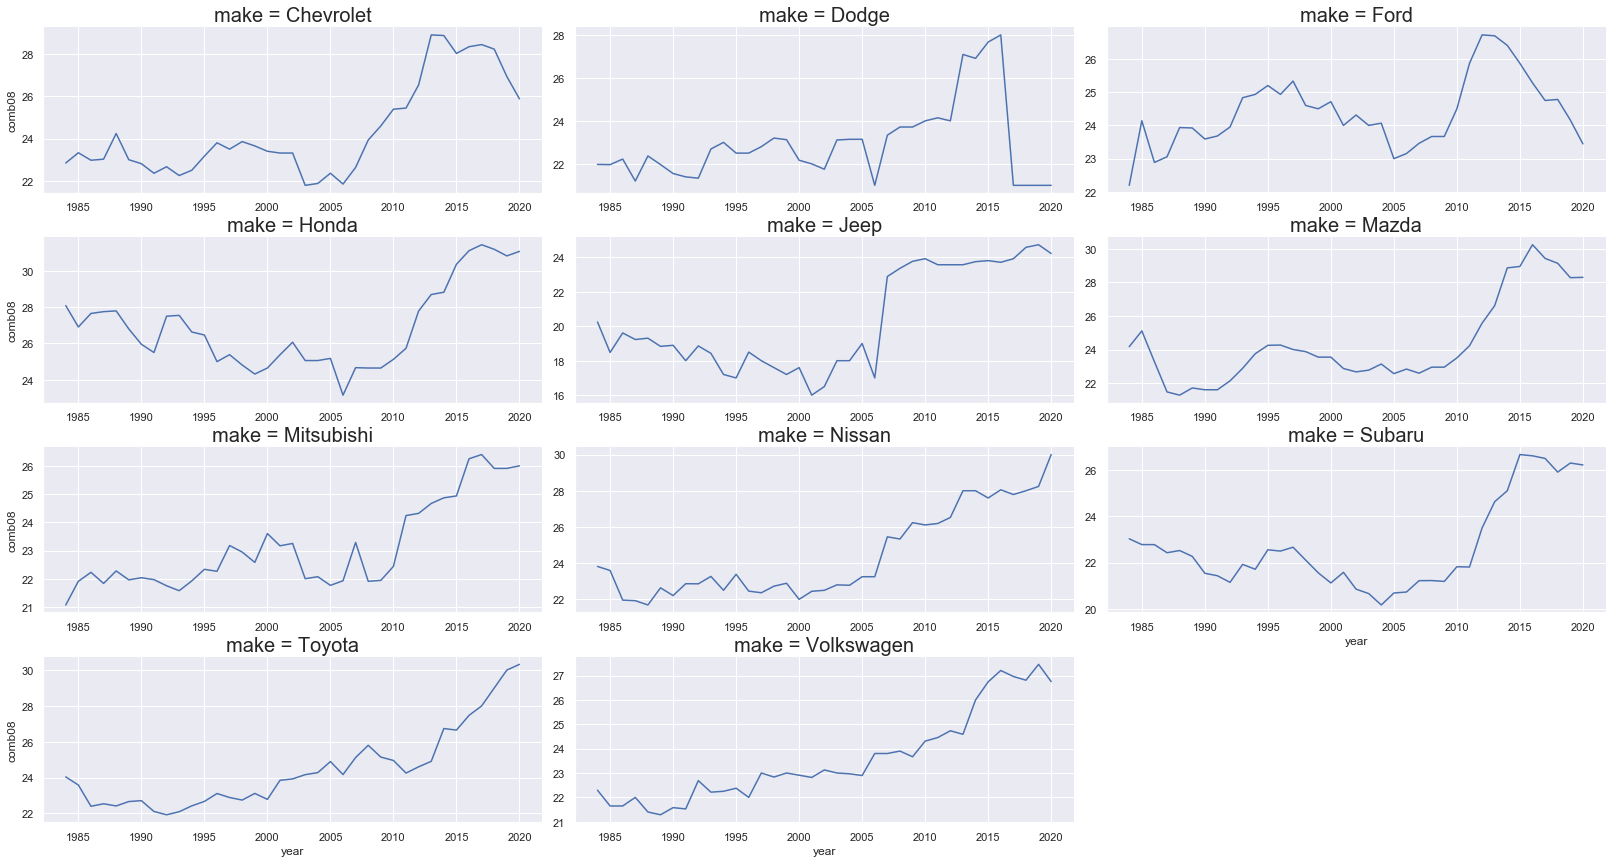

In [105]:
g = sns.FacetGrid(df_common_makes_grouped, col='make', col_wrap = 3, height = 3, aspect = 2.5, sharey=False, sharex = False)
g = g.map(plt.plot, 'year','comb08')
g.set_titles(size=20)